# Challenge: Crypto Clustering

###  Import the Data

In [62]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [63]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    Path("crypto_market_data.csv"),
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [64]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [65]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

###  Prepare the Data

In [66]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [67]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


###  Find the Best Value for k Using the Original Data

In [68]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

In [69]:
# Create an empy list to store the inertia values
inertia_values = []

In [70]:
# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)

    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_market_data_scaled)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

In [71]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

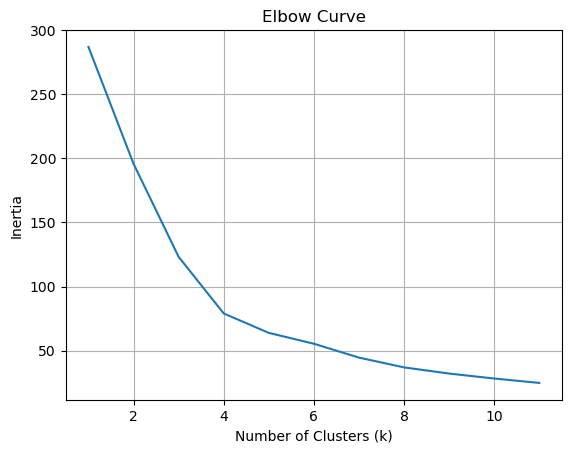

In [72]:
# Plot a line chart with all the inertia values computed with the different values of k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid()
plt.show()

### Answer the following question 

#### What is the best value for k?
##### Answer: 4

### Cluster Cryptocurrencies with K-means Using the Original Data

In [73]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k)

In [74]:
# Fit the K-Means model using the scaled data
cluster_labels = kmeans_model.fit_predict(df_market_data_scaled)

In [75]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(df_market_data_scaled)

# View the resulting array of cluster values
print(predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [76]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

In [77]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['Cluster'] = predicted_clusters

# Display sample data
print(df_market_data_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [78]:
# Create a scatter plot using hvPlot
scatter_plot = df_market_data_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='Cluster',
    colormap='viridis',
    hover_cols=['coin_id'],
    title="Cryptocurrency Clusters based on 24h and 7d Price Changes",
    width=800,
    height=400
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

###  Optimize Clusters with Principal Component Analysis

In [79]:
# Create a PCA model instance and set `n_components=3`
pca_model = PCA(n_components=3)

In [80]:
# Use the PCA model with `fit_transform` to reduce to three principal components
reduced_data = pca_model.fit_transform(df_market_data_scaled)

# Create a DataFrame with the reduced data
df_pca = pd.DataFrame(
    reduced_data,
    columns=["PC 1", "PC 2", "PC 3"],
    index=df_market_data_scaled.index
)

# View the first five rows of the DataFrame
print(df_pca.head())

                  PC 1      PC 2      PC 3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [81]:
# Retrieve the explained variance
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance
print("Explained Variance:", explained_variance)

Explained Variance: [0.3719856  0.34700813 0.17603793]


### Answer the following question 

#### What is the total explained variance of the three principal components?
##### Answer: The total explained variance of the three principal components is approximately 0.895 or 89.5%.

In [82]:
# Create a new DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(
    reduced_data,
    columns=["PC 1", "PC 2", "PC 3"]
)

# Copy the crypto names from the original data
df_market_data_pca["coin_id"] = df_market_data.index

# Set the coin_id column as the index
df_market_data_pca = df_market_data_pca.set_index("coin_id")

# Display sample data
print(df_market_data_pca.head())

                  PC 1      PC 2      PC 3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [83]:
# Create a list with the number of k-values to try
k_values = list(range(1, 12))

In [84]:
# Create an empty list to store the inertia values
inertia_values = []

In [85]:
# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)

    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(df_market_data_pca)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

In [86]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [87]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k
df_elbow.hvplot.line(
    x="k_values",
    y="inertia_values",
    xlabel="Number of Clusters (k)",
    ylabel="Inertia",
    title="Elbow Curve",
    width=800,
    height=400
)

:Curve   [k_values]   (inertia_values)

### Answer the following questions

#### What is the best value for k when using the PCA data?
##### Answer: 4

#### Does it differ from the best k value found using the original data?
##### Answer: No the answer for the k value using the orignal data and the PCA data remains the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [88]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4)

In [89]:
# Fit the K-Means model using the PCA data
cluster_labels = kmeans_model.fit_predict(df_market_data_pca)

In [90]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_model.predict(df_market_data_pca)

# View the resulting array of cluster values.
print(cluster_labels)

[2 2 1 1 2 2 2 2 2 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 3 2 1 1 0
 1 1 1 1]


In [91]:
# Create a copy of the DataFrame with the PCA data
df_market_data_clustered = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_clustered["cluster"] = cluster_labels

# Display sample data
print(df_market_data_clustered.head())

                  PC 1      PC 2      PC 3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        1
ripple       -0.471835 -0.222660 -0.479053        1
bitcoin-cash -1.157800  2.041209  1.859715        2


In [107]:
# Create a scatter plot using hvPlot
scatter_pca = df_pca.hvplot.scatter(
    x="PC 1",
    y="PC 2",
    c="clusters_pca",
    hover_cols=["coin_id"],
    title="PCA Data",
    width=800,
    height=400
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

###  Visualize and Compare the Results

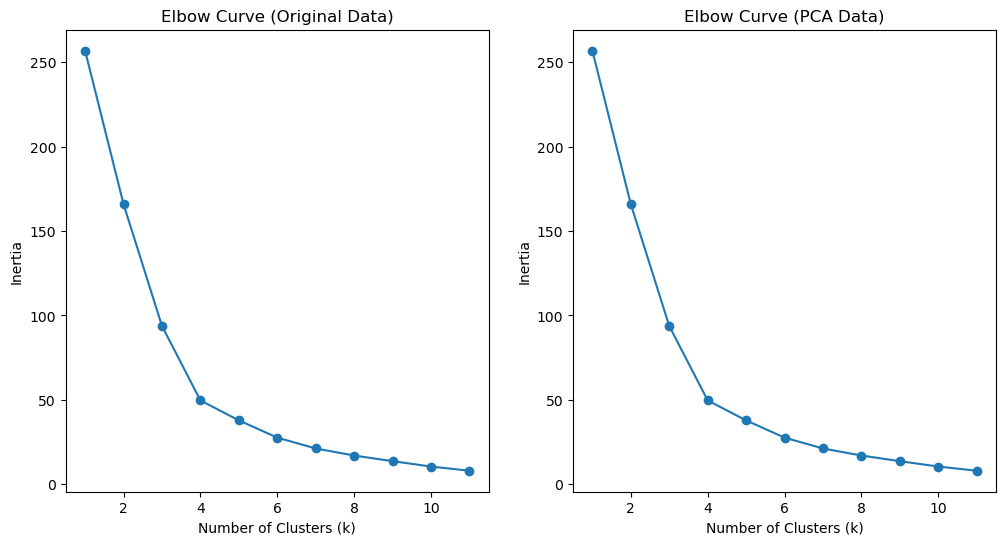

In [104]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot of the elbow curve for the original data
plt.subplot(121)
plt.plot(k_values, inertia_values, marker="o")
plt.title("Elbow Curve (Original Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# Create a line plot of the elbow curve for the PCA data
plt.subplot(122)
plt.plot(k_values, inertia_values, marker="o")
plt.title("Elbow Curve (PCA Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# Display the composite plot
plt.show()

In [108]:
# Scatter plot for original data
scatter_original = df_market_data_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="clusters_scaled",
    hover_cols=["coin_id"],
    title="Original Data",
    width=800,
    height=400
)

# Scatter plot for PCA data
scatter_pca = df_pca.hvplot.scatter(
    x="PC 1",
    y="PC 2",
    c="clusters_pca",
    hover_cols=["coin_id"],
    title="PCA Data",
    width=800,
    height=400
)

# Combine all plots into a single composite plot
(elbow_original + elbow_pca + scatter_original + scatter_pca).cols(2)


:Layout
   .Curve.Original_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data      :Curve   [k]   (inertia)
   .Scatter.I           :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .Scatter.II          :Scatter   [PC 1]   (PC 2,coin_id)

###  Answer the following question

#### After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

##### Answer: Reducing the number of features used in K-Means clustering, such as using only two principal components instead of all available features, can result in a loss of information and potentially less accurate clustering results. However, it can also help to simplify the analysis and make it easier to interpret the results visually. In the case of the cryptocurrency data, using only two principal components resulted in a clear separation of clusters, indicating that the chosen features were able to capture the important differences between the cryptocurrencies.